![DSL_logo](https://github.com/BrockDSL/Intro_to_Python_Workshop/blob/master/dsl_logo.png?raw=1) 


# Data Science with Python!

Welcome DASA to the Digital Scholarship Lab Level 2 Python workshop. In yesterday's Python workshoop, we covered the following:

- variables
- math
- conditional
- loops
- functions


What we'll learn today is:
- importing Pandas and Numpy libraries
- analyzing data with pandas


We'll be using Python as a Data Analysis tool

Before we get going the next cell should look totally familar to you

In [ ]:
scores = [3,5,6,2,1,6]

def find_mean(scores):
    
    sum = 0
    for s in scores:
        sum = sum + s
        
    return sum/len(scores)


print(find_mean(scores))

----

## Importing Libraries

- Our end goal is to re-use as much code as possible
- To do this we load in different Libraries using the `import` command
- For this example we want to load in the [statistics](https://docs.python.org/3/library/statistics.html) library

In [ ]:
import statistics

print(statistics.mean(scores))
print(statistics.median(scores))
print(statistics.mode(scores))

- Try Q1 - Q2 below and type "Got it" in the chat when you are done.

- **Q1** We can use the [math](https://docs.python.org/3/library/math.html) library to do interesting calculations, but we need to import it first. Eg. the function used to find the square root of a number is called `math.sqrt()` Modify the following code to print out the square root of the variable `number`.

In [ ]:
import math

number = 81

print(number)

The `str` library is so important that it is included all the time Python runs.

- **Q2**  Play around with printing the contents of the variable `all_caps` using different capitalization commands, as described in the cell's comments. (Details on the [str](https://docs.python.org/3/library/string.html) library, if your interested)

In [ ]:
all_caps = "HELLO PYTHON USER"

# add .lower() to the following line so that the variable represented by all_caps prints in all lowercase
print(all_caps)
# add .title() to the following line to capitalize the first letter of each word, and the rest lowercase
print(all_caps)
# add .capitalize() to the following line to capitalize only the first letter of the sentence, and the rest lowercase
print(all_caps)

# EXERCISE: Analyzing Red and White Wine Datasets: variants of the Portugese Vinho Verde Wine



We'll be focusing on data analysis for the rest of this workshop so let's import some libraries: [pandas](https://pandas.pydata.org/) and [numpy](https://pythonistaplanet.com/numpy/)

We will be analyzing a dataset composed of about 5000 observations of wine qualtity data.

You could use Excel to do some of this analysis true, but if you have a large dataset, using Excel is going to be difficult to work with.

![GetImage.png](GetImage.png)
There are 1599 rows of red wine data - this is just a sample view

Note: the data is not an Excel file (xlsx), but a csv. File. If you want to know how to convert a csv file to an xlsx file so that the formatting aligns properly, click [here](https://support.ecwid.com/hc/en-us/articles/207100869-Import-export-CSV-files-to-Excel) (optional - we're not using Excel in this workshop). 

Each of the two wine dataset has 12 columns 

- fixed acidity 

- volatile acidity 

- citric acid 

- residual sugar 

- chlorides  

- free sulfur dioxide 

- total sulfur dioxide 

- density  

- pH 

- sulphates 

- alcohol 

- quality 

The rows represent different wines tested

The quality column is the one we are interested in, and we want to analyze the data to see how the other columns (I.e. wine properties) are affecting the quality.  
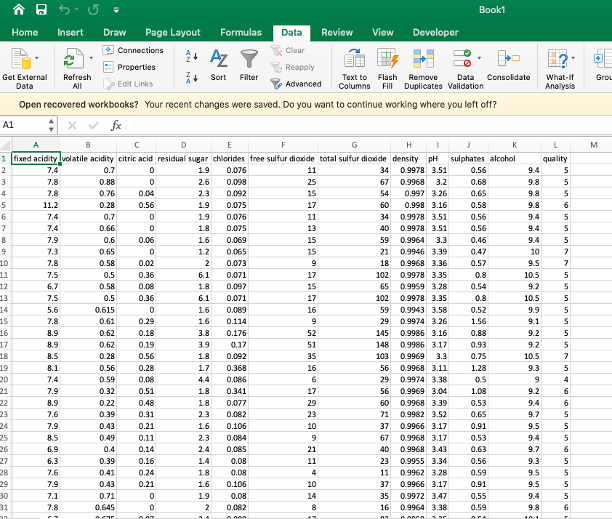

## Loading the Python Libraries

To get Python and the notebook ready we need to load the following cell

Numpy is a library that allows you to:

    - Use mathematical operations on matrices (lists, as we saw yesterday)

Pandas is a library used with numpy that allows you to:

    - Create Dataframes: a data structure consisting of rows and columns
    - Assign functions and other analytical operations to that dataframe

In [ ]:
#Load the Library Pandas, that works with data
import pandas as pd

#Load the Library Numpy, that works with numerical calculations
import numpy as np

#These two libraries are often used together!

In [ ]:
#Load the file into a dataframe using the pandas read_csv function
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

data.columns = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"] 

data.columns = data.columns.str.title()

#Show the first 10 lines
data.head(10)

Pandas can provide us some nice quantitative details about our data by calling the `describe()` function

In [ ]:
data.describe()

## Grouping and  Counting

- We also need to gather the entries we need by grouping them together with the `.groupby()` function. We can chain these things together to ask very specific questions of the data.
- We pass what column we'd like to group the data by
- We add `.count()` if we are just interested int the counts and not the dataframe

Group the red wine samples by the ranking numbers that were assigned during the wine testing study

In [ ]:
data.groupby('Quality')

In [ ]:
data.groupby("Quality").count()

Try questions Q4 & Q5 below and type "Finished!" in the chat box when you are done

**Q4** How many red wine samples have a Citric Acid level of 0.00?

**Q5** How many different Density levels are there in the dataset?

## Grouping and applying functions

- If we want to do some math on the data we need to cluster it together a bit. We use `.groupby()` and then apply our mathematical functions to the result
- Here we'll use the following 3 functions:
 - `mean()` finds the arithmetic mean of the data
 - `max()` finds the largest occurence of data in that column
 - `min()` finds the smallest occurennce of data in that column

What is the average residual sugar level of red wine samples with a fixed acidity of 4.6?

In [ ]:
data.groupby("Fixed Acidity")["Residual Sugar"].mean()

Try questions Q6-Q8 and type "All done" into the chat when you are finished"

- **Q6** What is the average Density of red wine samples of each `Alchohol` level?

- **Q7** What is the maximum Alcohol amount seen in each quality level?

- **Q8** What is the minimum Citric Acid level seen in each quality level?

# Sorting & Multi line commands 

- We can apply sorting to our dataframe actions by using the funciton `.sort_values()` 

- We need to give what column we'd like to sort it with `by =` 

- We also need to tell it to display it in an increase way `ascending = False` 

What Alcohol level has the lowest quality red wine? Here we do it in two steps 

In [ ]:
by_Alcohol = data.groupby("Alcohol").count() 

sorted_Alcohol = by_Alcohol.sort_values(by = "Quality",ascending = False) 

sorted_Alcohol

We could also do it in one step: 

In [ ]:
data.groupby("Alcohol").count().sort_values(by = "Quality",ascending = False) 

## Unique entries & values counts 

- Here we use `.unique()` to only give the first instances of the item. Results are returned as a list, which is useful for us later 

- This is useful for seeing how many values are in a categorical column 

In [ ]:
data["Alcohol"].unique() 

What are unique values for the Chlorides field? 

In [ ]:
data["Chlorides"].unique() 

- To get total number of unique values and frequency in the data we use `value_counts()'  

In [ ]:
data["Alcohol"].value_counts() 

## Selecting subsets of data 

- To make life easier we can create dataframes that just have the values we are interested in 

- This is a bit more complicated but follows this type of pattern: 

``` 

dataframe[dataframe[search criteria]] 

``` 

- We are basically creating a subset of the dataframe by matching all entries that match `search criteria` 

- That search criteria can be anything that is a conditional 

- Doing this gives you a new dataframe 

EG. A new dataframe of red wine with a Fixed Acidity level over 14

In [ ]:
over_14 = data[data["Fixed Acidity"] > 14] 

print(over_14) 

EG. If we want the count of red wine over 50, we apply the .count() function to what we selected 

In [ ]:
over_14.count() 

This can be done in 1 line as well 

In [ ]:
data[data["Fixed Acidity"] > 14].count() 

Try Q9-Q10 below and type "I got it" into the chat when you are done 

- **Q9** Can you make a new dataframe that just has red wine with a density of '0.9978' in it. Display the first 20 entries.

In [ ]:
Density_RedWine = 
Density_RedWine.head()

- **Q10** Can you 'describe' the newly created dataframe, to get some basic information on the columns in the dataframe?

# Some questions now

Let's first make a dataframe of all of the red wines with a quality less than 4

In [ ]:
Quality_RedWine = data[data["Quality"] < 4]
Quality_RedWine

Try answering Q11 - Q14, type "Finished" into the chat when you are done

- **Q11** How can we sort our `Quality_RedWine` dataframe?

- **Q12** What is the average Free Sulfur Dioxide level of those in the `Quality_RedWine` dataset ?

- **Q13** What is the max Alcohol amount of wine in the `Quality_RedWine` dataset?

- **Q14** What percentage of Red Wine in the `Quality_RedWine` dataset have a Volatile Acidity amount greater than 1? (This is probably the most complex question of the day, feel free to take as much time as you need to answer it)

# Congrats!

You now know a bit about Python Libraries and using some data analysis tools